In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [27]:
import pandas as pd
import numpy as np

planets = pd.read_csv('data/planets.csv').dropna()
planets.head()

,period,name,eccentricity,description,discoverymethod,periastrontime,lastupdate,semimajoraxis,mass,periastron,list,discoveryyear
0,326.03,11 Com b,0.231,11 Com b is a brown dwarf-mass companion to th...,RV,2452899.60,15/09/20,1.29,19.40,94.80,Confirmed planets,2008.0
1,516.22,11 UMi b,0.080,11 Ursae Minoris is a star located in the cons...,RV,2452861.04,15/09/20,1.54,11.20,117.63,Confirmed planets,2009.0
2,185.84,14 And b,0.000,14 Andromedae is an evolved star in the conste...,RV,2452861.40,15/09/20,0.83,4.80,0.00,Confirmed planets,2008.0
5,799.50,16 Cygni B b,0.689,16 Cygni is a hierarchical triple system. The ...,RV,2450539.30,15/09/22,1.72,1.77,83.40,Confirmed planets,1996.0
6,993.30,18 Del b,0.080,18 Delphini is a star in the constellation of ...,RV,2451672.00,15/09/23,2.60,10.30,166.10,Confirmed planets,2008.0


In [28]:
planets = planets.assign(
    shorther_period= np.where(planets.period < 365, 1, 0)
)

In [29]:
planets.head()

,period,name,eccentricity,description,discoverymethod,periastrontime,lastupdate,semimajoraxis,mass,periastron,list,discoveryyear,shorther_period
0,326.03,11 Com b,0.231,11 Com b is a brown dwarf-mass companion to th...,RV,2452899.60,15/09/20,1.29,19.40,94.80,Confirmed planets,2008.0,1
1,516.22,11 UMi b,0.080,11 Ursae Minoris is a star located in the cons...,RV,2452861.04,15/09/20,1.54,11.20,117.63,Confirmed planets,2009.0,0
2,185.84,14 And b,0.000,14 Andromedae is an evolved star in the conste...,RV,2452861.40,15/09/20,0.83,4.80,0.00,Confirmed planets,2008.0,1
5,799.50,16 Cygni B b,0.689,16 Cygni is a hierarchical triple system. The ...,RV,2450539.30,15/09/22,1.72,1.77,83.40,Confirmed planets,1996.0,0
6,993.30,18 Del b,0.080,18 Delphini is a star in the constellation of ...,RV,2451672.00,15/09/23,2.60,10.30,166.10,Confirmed planets,2008.0,0


In [30]:
x = planets[['eccentricity', 'semimajoraxis','mass']]
y = planets['shorther_period']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [39]:
pipeline= Pipeline([('scale', StandardScaler()), 
                       ('lr', LogisticRegression())])

In [40]:
pipeline.fit(x_train, y_train)

c:\users\korze\desktop\python\hands-on\book_venv\book_env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [41]:
prediction = pipeline.predict(x_test)

In [42]:
pipeline.score(x_test, y_test)

0.9696969696969697

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.92      0.96        12

   micro avg       0.97      0.97      0.97        33
   macro avg       0.98      0.96      0.97        33
weighted avg       0.97      0.97      0.97        33



In [44]:
from ml_utils.classification import confusion_matrix_visual, plot_roc

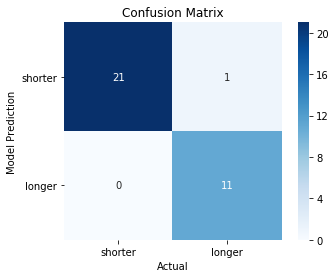

In [46]:
confusion_matrix_visual(y_test, prediction, ['shorter', 'longer'])

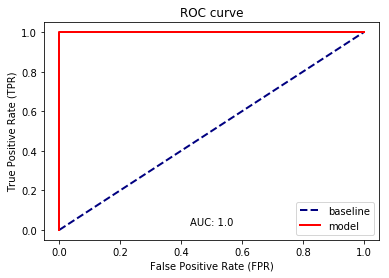

In [47]:
plot_roc(y_test, pipeline.predict_proba(x_test)[:,1])

In [49]:
planets.query('name == "Earth"')

,period,name,eccentricity,description,discoverymethod,periastrontime,lastupdate,semimajoraxis,mass,periastron,list,discoveryyear,shorther_period


In [51]:
planets.loc[planets.name.str.contains('earth')]

,period,name,eccentricity,description,discoverymethod,periastrontime,lastupdate,semimajoraxis,mass,periastron,list,discoveryyear,shorther_period
